## JSON

# JSON - Javascript Object Notation
#### Invented by Douglas Crockford when working at Yahoo in early 2000s.

* Goal - Human Readable, Machine Parsable

* Specification: https://www.json.org/

JSON — short for JavaScript Object Notation — format for sharing data. 

JSON is derived from the JavaScript programming language

Available for use by many languages including Python 

usually file extension is .json when stored



In [ ]:
# Sample JSON below from https://json.org/example.html
# Question why is Syntax highlighting working properly ? :)

In [1]:
{"widget": {
    "debug": "on",
    "window": {
        "title": "Sample Konfabulator Widget",
        "name": "main_window",
        "width": 500,
        "height": 500
    },
    "image": { 
        "src": "Images/Sun.png",
        "name": "sun1",
        "hOffset": 250,
        "vOffset": 250,
        "alignment": "center"
    },
    "text": {
        "data": "Click Here",
        "size": 36,
        "style": "bold",
        "name": "text1",
        "hOffset": 250,
        "vOffset": 100,
        "alignment": "center",
        "onMouseUp": "sun1.opacity = (sun1.opacity / 100) * 90;"
    }
}}    


{'widget': {'debug': 'on',
  'window': {'title': 'Sample Konfabulator Widget',
   'name': 'main_window',
   'width': 500,
   'height': 500},
  'image': {'src': 'Images/Sun.png',
   'name': 'sun1',
   'hOffset': 250,
   'vOffset': 250,
   'alignment': 'center'},
  'text': {'data': 'Click Here',
   'size': 36,
   'style': 'bold',
   'name': 'text1',
   'hOffset': 250,
   'vOffset': 100,
   'alignment': 'center',
   'onMouseUp': 'sun1.opacity = (sun1.opacity / 100) * 90;'}}}

In [2]:
# if this was string starting with { it would be our json
mydata = {
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": ["running", "sky diving", "dancing"],
    "age": 43,
    "children": [
        {
            "firstName": "Alice",
            "age": 7
        },
        {
            "firstName": "Bob",
            "age": 13
        }
    ]
}

In [3]:
type(mydata)

dict

In [4]:
print(mydata)

{'firstName': 'Jane', 'lastName': 'Doe', 'hobbies': ['running', 'sky diving', 'dancing'], 'age': 43, 'children': [{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]}


In [5]:
mydata['children']

[{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]

In [6]:
type(mydata['children'])

list

In [7]:
mydata['children'][0]

{'firstName': 'Alice', 'age': 7}

In [8]:
type(mydata['children'][0])

dict

In [9]:
mydata['children'][0]['age']

7

In [10]:
mydata['children'][-1]['age']

13

In [10]:
mydata.get('hobbies') # get has the default value None if the key is not found

['running', 'sky diving', 'dancing']

In [11]:
mydata.get('hobbies')[-1],mydata['hobbies'][-1],mydata['hobbies'][2]

('dancing', 'dancing', 'dancing')

In [ ]:
# list has no get [1,2,3].get(2) 

In [13]:
{"a":43,"b":30}.get("b")

30

The process of encoding JSON is usually called serialization. This term refers to the transformation of data into a series of bytes (hence serial) to be stored or transmitted across a network. You may also hear the term marshaling, but that’s a whole other discussion. Naturally, deserialization is the reciprocal process of decoding data that has been stored or delivered in the JSON standard.

All we’re talking about here is reading and writing. Think of it like this: encoding is for writing data to disk, while decoding is for reading data into memory.
 https://realpython.com/python-json/

In [12]:
mydata # simply a PYthon dictionary with some lists inside etc

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [13]:
# we need a library for decoding and encoding json 
# comes built into standard Python library
import json

In [14]:
# first we are going to dump our data into a text file
with open("data_file.json", mode="w") as write_file:
    json.dump(mydata, write_file)
# remember that stream is closed here and file is written by now

In [ ]:
# json.dump()

In [15]:
# this will be nicer
with open("data_file_indented.json", mode="w") as write_file:
    json.dump(mydata, write_file, indent=4) # so mydata could be any standard python data structure

In [16]:
mydata

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [17]:
mydata['children'].append({'firstName':"Čarlijs", 'age':14})
mydata

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'firstName': 'Čarlijs', 'age': 14}]}

In [18]:
# this will be nicer
with open("data_file_indented_ch.json", mode="w") as write_file:
    json.dump(mydata, write_file, indent=4) # so mydata could be any standard python data structure

In [19]:
# when we want to save unicode directly
with open("data_file_indented_ch_unicode.json", mode="w", encoding="utf-8") as write_file:
    json.dump(mydata, write_file, indent=4, ensure_ascii=False) # when we want unicode inside our json text file

In [20]:
mylist = ["Valdis", {"likes":["potatoes", "chocolate"]}, 50, 60, 70]
mylist

['Valdis', {'likes': ['potatoes', 'chocolate']}, 50, 60, 70]

In [21]:
with open("mylist.json", mode="w") as write_file:
    json.dump(mylist, write_file, indent=4)

# Reading JSON and then deserialization (txt -> Python data structure)

In [22]:
with open("data_file_indented.json") as f:
    raw_txt = f.read()
# raw_txt[:150] # so again raw JSON is just text
raw_txt

'{\n    "firstName": "Jane",\n    "lastName": "Doe",\n    "hobbies": [\n        "running",\n        "sky diving",\n        "dancing"\n    ],\n    "age": 43,\n    "children": [\n        {\n            "firstName": "Alice",\n            "age": 7\n        },\n        {\n            "firstName": "Bob",\n            "age": 13\n        }\n    ]\n}'

In [23]:
type(raw_txt)

str

In [24]:
# deserialize, decode from json string into Python Data structure
my_data = json.loads(raw_txt)
type(my_data)

dict

In [25]:
my_data.keys()

dict_keys(['firstName', 'lastName', 'hobbies', 'age', 'children'])

In [26]:
my_data

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [27]:
my_data['children']

[{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]

In [28]:
# more often we will load json immediately
with open("data_file_indented.json") as f:
    my_data_2 = json.load(f) # if json is malformed then you will get some sort of error
type(my_data_2)

dict

In [29]:
# contents are the same but two different objects
my_data == my_data_2, my_data is my_data_2

(True, False)

In [30]:
my_json_string = json.dumps(my_data) # convert Python data structure(list,dictionary, and so on) into json string
# my_json_string[:100]
my_json_string

'{"firstName": "Jane", "lastName": "Doe", "hobbies": ["running", "sky diving", "dancing"], "age": 43, "children": [{"firstName": "Alice", "age": 7}, {"firstName": "Bob", "age": 13}]}'

In [31]:
type(my_json_string)

str

In [32]:
my_data_structure = json.loads(my_json_string)
my_data_structure

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [33]:
mylist.extend([True, False, None])
mylist

['Valdis', {'likes': ['potatoes', 'chocolate']}, 50, 60, 70, True, False, None]

In [34]:
json.dumps(mylist) # this gives us json formatted string

'["Valdis", {"likes": ["potatoes", "chocolate"]}, 50, 60, 70, true, false, null]'

In [35]:
mylist.append((1,2,3))
mylist

['Valdis',
 {'likes': ['potatoes', 'chocolate']},
 50,
 60,
 70,
 True,
 False,
 None,
 (1, 2, 3)]

In [36]:
json.dumps(mylist) # this gives us json formatted string

'["Valdis", {"likes": ["potatoes", "chocolate"]}, 50, 60, 70, true, false, null, [1, 2, 3]]'

In [37]:
json.dumps(my_data)

'{"firstName": "Jane", "lastName": "Doe", "hobbies": ["running", "sky diving", "dancing"], "age": 43, "children": [{"firstName": "Alice", "age": 7}, {"firstName": "Bob", "age": 13}]}'

In [38]:
import requests # this library is not included with Python but is very popular and comes with Anaconda
# pip install requests otherwise

In [39]:
# we make a http request to a url and print the response code
url = "https://my.api.mockaroo.com/ageincluded.json?key=58227cb0"
response = requests.get(url) # so we made a HTTP GET request here just like a browser would
print(response.status_code) # Response Code 200 is good! 404 not good :)

200


In [40]:
data_from_json = response.json() # we do not need json.loads
type(data_from_json), len(data_from_json)

(list, 100)

In [41]:
response.text[:50]

'[{"id":1,"first_name":"Orin","last_name":"Lafflina'

In [42]:
my_mock_data = json.loads(response.text) # kind of useless since we have response.json()
type(my_mock_data), len(my_mock_data)

(list, 100)

In [43]:
data_from_json == my_mock_data, data_from_json is my_mock_data 
# again data is the same, but 2 different objects

(True, False)

In [44]:
import pandas as pd # Anaconda includes by default

In [45]:
# good when JSON is relatively flat (2d preferably)
df = pd.read_json(url) # so includes parsing and request to the server
df.head()

,id,first_name,last_name,email,gender,ip_address,age
0,1,Tedi,Faier,tfaier0@geocities.com,Polygender,6.229.190.47,28
1,2,Morly,Kemer,mkemer1@vinaora.com,Non-binary,23.3.27.115,26
2,3,Myrvyn,Willowby,mwillowby2@mail.ru,Genderqueer,35.32.150.96,61
3,4,Kali,Olenchikov,kolenchikov3@wisc.edu,Female,195.209.76.87,48
4,5,Packston,Becraft,pbecraft4@fda.gov,Agender,219.199.55.119,42


In [46]:
df.to_csv("mock_data.csv")

In [47]:
data_from_json[:3]

[{'id': 1,
  'first_name': 'Dannel',
  'last_name': 'Imlin',
  'email': 'dimlin0@pinterest.com',
  'gender': 'Bigender',
  'ip_address': '110.111.108.124',
  'age': 76},
 {'id': 2,
  'first_name': 'Ravid',
  'last_name': 'Deniseau',
  'email': 'rdeniseau1@webmd.com',
  'gender': 'Female',
  'ip_address': '236.177.156.163',
  'age': 58},
 {'id': 3,
  'first_name': 'Kristy',
  'last_name': 'Rambaut',
  'email': 'krambaut2@cafepress.com',
  'gender': 'Polygender',
  'ip_address': '47.134.70.216',
  'age': 22}]

In [47]:
df2 = pd.DataFrame(data_from_json) # in this data_from_json is Python data structure list
df2.head()

,id,first_name,last_name,email,gender,ip_address,age
0,1,Orin,Lafflina,olafflina0@posterous.com,Non-binary,33.22.36.24,84
1,2,Kiele,Paige,kpaige1@tuttocitta.it,Male,74.68.50.69,47
2,3,Rozamond,Nevins,rnevins2@flickr.com,Genderfluid,86.205.249.82,90
3,4,Rosco,Gocke,rgocke3@usa.gov,Polygender,198.85.80.108,48
4,5,Angel,Joanic,ajoanic4@ow.ly,Female,172.232.248.226,56


In [ ]:
# idea get average age of Japanese Men in our JSON data



In [48]:
df.head()

,id,first_name,last_name,email,gender,ip_address,age
0,1,Tedi,Faier,tfaier0@geocities.com,Polygender,6.229.190.47,28
1,2,Morly,Kemer,mkemer1@vinaora.com,Non-binary,23.3.27.115,26
2,3,Myrvyn,Willowby,mwillowby2@mail.ru,Genderqueer,35.32.150.96,61
3,4,Kali,Olenchikov,kolenchikov3@wisc.edu,Female,195.209.76.87,48
4,5,Packston,Becraft,pbecraft4@fda.gov,Agender,219.199.55.119,42


In [49]:
males = df[df.gender == "Male"]
males.head(10)

,id,first_name,last_name,email,gender,ip_address,age
5,6,Loy,Weepers,lweepers5@facebook.com,Male,180.6.107.119,2
25,26,Gena,Laidlaw,glaidlawp@wikipedia.org,Male,208.143.7.113,33
31,32,Trueman,Ellar,tellarv@hp.com,Male,69.157.160.74,59
49,50,Wilie,Swadlen,wswadlen1d@yahoo.co.jp,Male,74.207.119.80,59
65,66,Archibold,Morffew,amorffew1t@gnu.org,Male,248.158.34.0,61
73,74,Traver,Duke,tduke21@weebly.com,Male,3.104.30.43,16
84,85,Noami,Oakly,noakly2c@wix.com,Male,243.147.209.214,10
86,87,Alverta,Nowick,anowick2e@mlb.com,Male,172.101.50.110,45
91,92,Florry,Kerrigan,fkerrigan2j@quantcast.com,Male,143.142.215.15,48
96,97,Corbie,Aslen,caslen2o@pcworld.com,Male,163.51.187.183,98


In [50]:
adult_males = df[(df.gender == "Male") & (df.age > 18)]
adult_males.head()

,id,first_name,last_name,email,gender,ip_address,age
25,26,Gena,Laidlaw,glaidlawp@wikipedia.org,Male,208.143.7.113,33
31,32,Trueman,Ellar,tellarv@hp.com,Male,69.157.160.74,59
49,50,Wilie,Swadlen,wswadlen1d@yahoo.co.jp,Male,74.207.119.80,59
65,66,Archibold,Morffew,amorffew1t@gnu.org,Male,248.158.34.0,61
86,87,Alverta,Nowick,anowick2e@mlb.com,Male,172.101.50.110,45


In [ ]:
data_from_json[:5]

In [52]:
myjson = data_from_json # just an alias
myjson[:3]

[{'id': 1,
  'first_name': 'Orin',
  'last_name': 'Lafflina',
  'email': 'olafflina0@posterous.com',
  'gender': 'Non-binary',
  'ip_address': '33.22.36.24',
  'age': 84},
 {'id': 2,
  'first_name': 'Kiele',
  'last_name': 'Paige',
  'email': 'kpaige1@tuttocitta.it',
  'gender': 'Male',
  'ip_address': '74.68.50.69',
  'age': 47},
 {'id': 3,
  'first_name': 'Rozamond',
  'last_name': 'Nevins',
  'email': 'rnevins2@flickr.com',
  'gender': 'Genderfluid',
  'ip_address': '86.205.249.82',
  'age': 90}]

In [53]:
japanese = [person for person in myjson if person.get('email',"").endswith('.jp')]
# potentially person.get('email') could return None then .endswith('.jp') would fail with error
japanese

[{'id': 25,
  'first_name': 'Alon',
  'last_name': 'De Lisle',
  'email': 'adelisleo@sakura.ne.jp',
  'gender': 'Polygender',
  'ip_address': '13.223.107.165',
  'age': 57},
 {'id': 38,
  'first_name': 'Erica',
  'last_name': 'Jeffries',
  'email': 'ejeffries11@sakura.ne.jp',
  'gender': 'Polygender',
  'ip_address': '99.47.159.73',
  'age': 44},
 {'id': 95,
  'first_name': 'Annabella',
  'last_name': 'Sicely',
  'email': 'asicely2m@goo.ne.jp',
  'gender': 'Genderfluid',
  'ip_address': '120.27.185.11',
  'age': 67}]

In [54]:
japanese_men = [p for p in japanese if p.get('gender') == "Male"]
# potentially person.get('email') could return None then .endswith('.jp') would fail with error
japanese_men

[]

In [55]:
uk = [person for person in myjson if person.get('email',"").endswith('.uk')]
uk

[{'id': 6,
  'first_name': 'Em',
  'last_name': 'Dack',
  'email': 'edack5@amazon.co.uk',
  'gender': 'Male',
  'ip_address': '180.31.99.20',
  'age': 10},
 {'id': 7,
  'first_name': 'Sonnie',
  'last_name': 'Bauduin',
  'email': 'sbauduin6@timesonline.co.uk',
  'gender': 'Non-binary',
  'ip_address': '132.55.237.199',
  'age': 69},
 {'id': 53,
  'first_name': 'Loren',
  'last_name': 'Pannett',
  'email': 'lpannett1g@bbc.co.uk',
  'gender': 'Genderfluid',
  'ip_address': '142.63.130.42',
  'age': 5},
 {'id': 56,
  'first_name': 'Sonnie',
  'last_name': 'Pinkstone',
  'email': 'spinkstone1j@thetimes.co.uk',
  'gender': 'Non-binary',
  'ip_address': '138.38.5.220',
  'age': 91},
 {'id': 66,
  'first_name': 'Codee',
  'last_name': 'McLeish',
  'email': 'cmcleish1t@independent.co.uk',
  'gender': 'Genderqueer',
  'ip_address': '156.129.120.69',
  'age': 55},
 {'id': 74,
  'first_name': 'Rodi',
  'last_name': 'Noen',
  'email': 'rnoen21@google.co.uk',
  'gender': 'Female',
  'ip_address': '

In [56]:
uk_ages = [(person.get('first_name'),person.get('email'), person.get('sports'), int(person.get('age'))) for person in uk]
uk_ages # noone plays sports in uk....

[('Em', 'edack5@amazon.co.uk', None, 10),
 ('Sonnie', 'sbauduin6@timesonline.co.uk', None, 69),
 ('Loren', 'lpannett1g@bbc.co.uk', None, 5),
 ('Sonnie', 'spinkstone1j@thetimes.co.uk', None, 91),
 ('Codee', 'cmcleish1t@independent.co.uk', None, 55),
 ('Rodi', 'rnoen21@google.co.uk', None, 64),
 ('Gus', 'gduckham22@independent.co.uk', None, 16)]

In [57]:
with open("uk_ages.json", mode="w") as fstream:
    json.dump(uk_ages, fstream, indent=4)

In [ ]:
uk_ages

In [58]:
# so we lose the tuple designed when writing to JSON and back
with open("uk_ages.json") as fstream:
    uk_data = json.load(fstream)
uk_data

[['Em', 'edack5@amazon.co.uk', None, 10],
 ['Sonnie', 'sbauduin6@timesonline.co.uk', None, 69],
 ['Loren', 'lpannett1g@bbc.co.uk', None, 5],
 ['Sonnie', 'spinkstone1j@thetimes.co.uk', None, 91],
 ['Codee', 'cmcleish1t@independent.co.uk', None, 55],
 ['Rodi', 'rnoen21@google.co.uk', None, 64],
 ['Gus', 'gduckham22@independent.co.uk', None, 16]]

In [ ]:
with open("jp_ages.json", mode="w") as fstream:
    json.dump(jp_ages, fstream, indent=4)

In [ ]:
type(mydata)

In [ ]:
json_string = my_json_string # just an alias
json_string

In [ ]:
type(json_string)

In [ ]:
type(mydata)

In [ ]:
# Convert Json_string back to our Python Object
my_obj = json.loads(json_string)
my_obj

In [ ]:
my_obj.get('firstName')

In [ ]:
mydata

In [ ]:
newlist = json.loads('[1,3,5,"Valdis"]')
newlist

In [ ]:
type(newlist)

In [ ]:
badlist = json.loads('[1,3,5,"Vald]",334342]')
badlist

In [ ]:
type(json_string)

In [ ]:
# Avove example JSON and Python object have the same syntax but there are some differences

![object](../img/object.png)

![Array](../img/array.png)

![Value](../img/value.png)

Simple Python objects are translated to JSON according to a fairly intuitive conversion.

Python	JSON

dict <->	object

list, tuple <->	array

str	<-> string

int, float	<-> number

True <->true

False <->false

None <->	null

Keep in mind that the result of this method could return any of the allowed data types from the conversion table. This is only important if you’re loading in data you haven’t seen before. In most cases, the root object will be a dict or a list.

If you've gotten JSON data in from another program or have otherwise obtained a string of JSON formatted data in Python, you can easily deserialize that with loads(), which naturally loads from a string:

In [ ]:
json_string = """
{
    "researcher": {
        "name": "Ford Prefect",
        "species": "Betelgeusian",
        "relatives": [
            {
                "name": "Zaphod Beeblebrox",
                "species": "Betelgeusian"
            }
        ]
    }
}
"""
data = json.loads(json_string)
data

In [ ]:
# get value of relative's name
data['researcher']

In [ ]:
# get value of relative's name
data['researcher']['relatives']

In [ ]:
# get value of relative's name
data['researcher']['relatives'][0]

In [ ]:
# get value of relative's name
data['researcher']['relatives'][0]['name']

In [ ]:
data['researcher']['relatives'][0]['name'].split()[0]

In [ ]:
data['researcher']['relatives'][0]['name'].split()[0][:4]

In [ ]:
type(data)

In [ ]:
import json
import requests

In [ ]:
## Lets get some data https://jsonplaceholder.typicode.com/

In [66]:
response = requests.get("https://jsonplaceholder.typicode.com/todos")
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print(response.status_code)
todos = json.loads(response.text)


200


can open https://jsonplaceholder.typicode.com/todos in regular browser too..

In [67]:
type(todos)

list

In [68]:
len(todos)

200

In [69]:
todos[:10]

[{'userId': 1, 'id': 1, 'title': 'delectus aut autem', 'completed': False},
 {'userId': 1,
  'id': 2,
  'title': 'quis ut nam facilis et officia qui',
  'completed': False},
 {'userId': 1, 'id': 3, 'title': 'fugiat veniam minus', 'completed': False},
 {'userId': 1, 'id': 4, 'title': 'et porro tempora', 'completed': True},
 {'userId': 1,
  'id': 5,
  'title': 'laboriosam mollitia et enim quasi adipisci quia provident illum',
  'completed': False},
 {'userId': 1,
  'id': 6,
  'title': 'qui ullam ratione quibusdam voluptatem quia omnis',
  'completed': False},
 {'userId': 1,
  'id': 7,
  'title': 'illo expedita consequatur quia in',
  'completed': False},
 {'userId': 1,
  'id': 8,
  'title': 'quo adipisci enim quam ut ab',
  'completed': True},
 {'userId': 1,
  'id': 9,
  'title': 'molestiae perspiciatis ipsa',
  'completed': False},
 {'userId': 1,
  'id': 10,
  'title': 'illo est ratione doloremque quia maiores aut',
  'completed': True}]

In [70]:
# completedworks = [el for el in todos if el['completed'] == True]
completedworks = [el for el in todos if el.get('completed') == True]
len(completedworks)

90

In [71]:
completedworks[-10:]

[{'userId': 10, 'id': 188, 'title': 'vel non beatae est', 'completed': True},
 {'userId': 10,
  'id': 189,
  'title': 'culpa eius et voluptatem et',
  'completed': True},
 {'userId': 10,
  'id': 190,
  'title': 'accusamus sint iusto et voluptatem exercitationem',
  'completed': True},
 {'userId': 10,
  'id': 191,
  'title': 'temporibus atque distinctio omnis eius impedit tempore molestias pariatur',
  'completed': True},
 {'userId': 10,
  'id': 193,
  'title': 'rerum debitis voluptatem qui eveniet tempora distinctio a',
  'completed': True},
 {'userId': 10,
  'id': 195,
  'title': 'rerum ex veniam mollitia voluptatibus pariatur',
  'completed': True},
 {'userId': 10,
  'id': 196,
  'title': 'consequuntur aut ut fugit similique',
  'completed': True},
 {'userId': 10,
  'id': 197,
  'title': 'dignissimos quo nobis earum saepe',
  'completed': True},
 {'userId': 10,
  'id': 198,
  'title': 'quis eius est sint explicabo',
  'completed': True},
 {'userId': 10,
  'id': 199,
  'title': 'numqu

In [ ]:
type(completedworks)

In [72]:
users = {}
for el in completedworks:
    k = el['userId']
    if k in users:
        users[k] +=1
    else:
        users[k] = 1
users

{1: 11, 2: 8, 3: 7, 4: 6, 5: 12, 6: 6, 7: 9, 8: 11, 9: 8, 10: 12}

In [73]:
users.items()

dict_items([(1, 11), (2, 8), (3, 7), (4, 6), (5, 12), (6, 6), (7, 9), (8, 11), (9, 8), (10, 12)])

In [74]:
sorted(users.items(),key = lambda el: el[1], reverse=True)

[(5, 12),
 (10, 12),
 (1, 11),
 (8, 11),
 (7, 9),
 (2, 8),
 (9, 8),
 (3, 7),
 (4, 6),
 (6, 6)]

In [75]:
# much simpler to use Counter
from collections import Counter

In [ ]:
[el['userId'] for el in completedworks]

In [76]:
count = Counter([el['userId'] for el in completedworks])
count.most_common()

[(5, 12),
 (10, 12),
 (1, 11),
 (8, 11),
 (7, 9),
 (2, 8),
 (9, 8),
 (3, 7),
 (4, 6),
 (6, 6)]

In [ ]:
todos[:2]

In [77]:
# lets do everything at once
finishedcount = Counter([el.get('userId') for el in todos if el.get('completed') == True])
finishedcount.most_common()

[(5, 12),
 (10, 12),
 (1, 11),
 (8, 11),
 (7, 9),
 (2, 8),
 (9, 8),
 (3, 7),
 (4, 6),
 (6, 6)]

In [78]:
import matplotlib.pyplot as plt

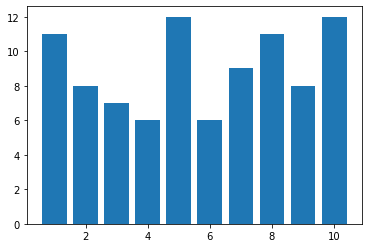

In [79]:
plt.bar(finishedcount.keys(), finishedcount.values())
plt.show()

In [ ]:
todos[-3:]

In [ ]:
[1,2] + [3,4,6,6]

In [ ]:
todos += [{'completed':True},{'completed':True},{'completed':True},{'completed':True}]
todos[-5:]

In [ ]:
# lets do everything at once
finishedcount = Counter([el.get('userId') for el in todos if el.get('completed') == True])
finishedcount.most_common()

In [ ]:
myl = [('Valdis', 40), ('Alice',35), ('Bob', 23),('Carol',70)]

In [ ]:
# Lambda = anonymous function

In [ ]:
def myfun(el):
    return el[1]
# same as myfun = lambda el: el[1]

In [ ]:
sorted(myl, key = lambda el: el[1], reverse=True)

In [ ]:
# Exercise find out top 3 users with most tasks completed!

# TIPS
# we need some sort of structure to store these user results before finding out top 3
# at least two good data structure choices here :)
# here the simplest might actually be the best if we consider userId values


In [ ]:
todos[0]

In [ ]:
todos[0]['userId']

In [ ]:
todos[0]['completed']

In [ ]:
# Here we create a new dictionary and and count the completed works by id
newdict = {}
for todo in todos:
    if todo['completed'] == True:
        if todo['userId'] in newdict:
            newdict[todo['userId']] += 1
        else:
            newdict[todo['userId']] = 1

In [ ]:
newdict

In [ ]:
sorted(newdict.items())

In [ ]:
bestworkers = sorted(newdict.items(), key=lambda el: el[1], reverse=True)
bestworkers[:3]

In [ ]:
users = [ el['userId'] for el in todos]
len(users),users[:15]

In [ ]:
uniqusers = set(users)
uniqusers

In [ ]:
# dictionary comprehension but could live without one
users = { el['userId'] : 0 for el in todos} 

In [ ]:
users

In [ ]:
users.keys()

In [ ]:
users.value

In [ ]:
#{'completed': True,
# 'id': 8,
#  'title': 'quo adipisci enim quam ut ab',
#  'userId': 1}

In [ ]:
#idiomatic
for el in todos:
    users[el['userId']] += el['completed'] # Boolean False is 0 True is 1 obviously this might not be too readable

In [ ]:
# same as above could be useful in more complicated cases
for el in todos:
    if el['completed'] == True:
        users[el['userId']] += 1

In [ ]:
# there could be a one liner or a solution with from collections import Counter

In [ ]:
users.items()

In [ ]:
list(users.items())

In [ ]:
userlist=list(users.items())

In [ ]:
type(userlist[0])

In [ ]:
# we pass a key anonymous(lambda) function
sorted(userlist, key=lambda el: el[1], reverse=True)[:3]

In [ ]:
# lets try a simple way

In [ ]:
mylist=[0]
mylist*=11

In [ ]:
for el in todos:
    if el['completed'] == True:
        mylist[el['userId']] +=1

In [ ]:
mylist

In [ ]:
mylist.index(max(mylist))

In [ ]:
# kind of hard to get more values need to get tricky

# How about Pandas and Json ?

In [80]:
import pandas as pd

In [61]:
df = pd.read_json('https://jsonplaceholder.typicode.com/todos') # SO THIS ACCESSes THE url

In [62]:
df.head()

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False


In [83]:
df.to_csv('my_todos.csv')

In [84]:
df.shape

(200, 4)

In [63]:
df.describe()

,userId,id
count,200.000000,200.000000
mean,5.500000,100.500000
std,2.879489,57.879185
min,1.000000,1.000000
25%,3.000000,50.750000
50%,5.500000,100.500000
75%,8.000000,150.250000
max,10.000000,200.000000


In [64]:
df.describe(include=['O'])

,title
count,200
unique,200
top,aut id perspiciatis voluptatem iusto
freq,1


In [65]:
# we see that completed
df.groupby(['userId']).sum()

,id,completed
userId,,
1,210,11.0
2,610,8.0
3,1010,7.0
4,1410,6.0
5,1810,12.0
6,2210,6.0
7,2610,9.0
8,3010,11.0
9,3410,8.0


In [87]:
df.groupby(['userId']).sum()['completed']

userId
1     11.0
2      8.0
3      7.0
4      6.0
5     12.0
6      6.0
7      9.0
8     11.0
9      8.0
10    12.0
Name: completed, dtype: float64

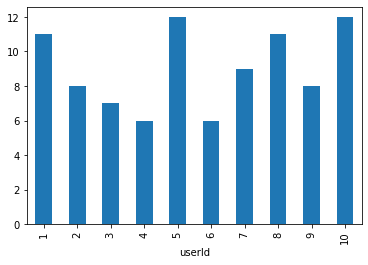

In [66]:
df.groupby(['userId']).sum()['completed'].plot(kind="bar")

In [ ]:
busyjson

In [ ]:
df.groupby(['userId'])['completed'].sum()

In [ ]:
# if we need a single column dataframe
df.groupby(['userId'])[['completed']].sum()

In [ ]:
df.groupby(['userId'])['completed'].sum().sort_values()

In [ ]:
df.groupby(['userId'])['completed'].sum().sort_values(ascending=False)

In [ ]:
busyjson = pd.read_json('https://jsonplaceholder.typicode.com/todos').groupby(['userId'])['completed'].sum().sort_values(ascending=False).to_json()

In [ ]:
def prettyJSON(myjson):
    return json.dumps(json.loads(myjson), indent=4)

In [ ]:
type(busyjson)

In [ ]:
prettybusy = prettyJSON(busyjson)

In [ ]:
with open('prettybusy.json', mode='w') as f:
    f.write(prettybusy)

# Exercise Find Public JSON API get data and convert it into Pandas DataFrame

## Many possible sources

https://github.com/toddmotto/public-apis
    
### You want the ones without authorization and WITH CORS unless you are feeling adventurous and want to try with auth



In [ ]:
df = pd.read_json('https://cat-fact.herokuapp.com/facts/random?animal_type=cat&amount=50')
df.head()

In [ ]:
df.columns = sorted(df.columns)
df.head()

In [ ]:
response = requests.get("https://cat-fact.herokuapp.com/facts/random?animal_type=cat&amount=50")
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print(response.status_code)
cats = json.loads(response.text)
cats[:3]

In [ ]:
response = requests.get("https://cat-fact.herokuapp.com/facts/random",
                        params={"animal_type":"cat", "amount":20})
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print(response.status_code)
cats = json.loads(response.text) # simpler response.json() 
cats[:3]

In [ ]:
len(cats)`

In [ ]:
response.status_code

In [ ]:
cats2 = response.json()
len(cats2)

In [ ]:
cats2 == cats, cats2 is cats 
#data are the same we just have two different copies of them

In [ ]:
df.loc[0, 'text']

In [ ]:
## For authorization you generally need some sort of token(key)
# One example for zendesk API  https://develop.zendesk.com/hc/en-us/community/posts/360001652447-API-auth-in-python


# For an API token, append '/token' to your username and use the token as the password:
## This will not work for those without zendesk access token

url = 'https://your_subdomain.zendesk.com/api/v2/users/123.json'
r = requests.get(url, auth=('user@example.com/token', 'your_token'))
# For an OAuth token, set an Authorization header:

bearer_token = 'Bearer ' + access_token
header = {'Authorization': bearer_token}
url = 'https://your_subdomain.zendesk.com/api/v2/users/123.json'
r = requests.get(url, headers=header)

In [59]:
def myReadJSON(url):
    response = requests.get(url)
    if response.status_code != 200:
        print("Bad Response: ", response.status_code)
    print("Status CODE", response.status_code)
    return json.loads(response.text)


In [60]:
rawdrinks = myReadJSON("https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita")
type(rawdrinks)

Status CODE 200


dict

In [61]:
rawdrinks.keys()

dict_keys(['drinks'])

In [62]:
type(rawdrinks.get("drinks"))

list

In [63]:
# so a list of dictionaries will translate nicely to dataframe
mydrinks = pd.DataFrame(rawdrinks['drinks'])
mydrinks.head()

,idDrink,strDrink,strDrinkAlternate,strTags,strVideo,strCategory,strIBA,strAlcoholic,strGlass,strInstructions,...,strMeasure10,strMeasure11,strMeasure12,strMeasure13,strMeasure14,strMeasure15,strImageSource,strImageAttribution,strCreativeCommonsConfirmed,dateModified
0,11007,Margarita,None,"IBA,ContemporaryClassic",None,Ordinary Drink,Contemporary Classics,Alcoholic,Cocktail glass,Rub the rim of the glass with the lime slice t...,...,None,None,None,None,None,None,https://commons.wikimedia.org/wiki/File:Klassi...,Cocktailmarler,Yes,2015-08-18 14:42:59
1,11118,Blue Margarita,None,None,None,Ordinary Drink,None,Alcoholic,Cocktail glass,Rub rim of cocktail glass with lime juice. Dip...,...,None,None,None,None,None,None,None,None,Yes,2015-08-18 14:51:53
2,17216,Tommy's Margarita,None,"IBA,NewEra",None,Ordinary Drink,New Era Drinks,Alcoholic,Old-Fashioned glass,Shake and strain into a chilled cocktail glass.,...,None,None,None,None,None,None,None,None,No,2017-09-02 18:37:54
3,16158,Whitecap Margarita,None,None,None,Other/Unknown,None,Alcoholic,Margarita/Coupette glass,Place all ingredients in a blender and blend u...,...,None,None,None,None,None,None,None,None,No,2015-09-02 17:00:22
4,12322,Strawberry Margarita,None,None,None,Ordinary Drink,None,Alcoholic,Cocktail glass,Rub rim of cocktail glass with lemon juice and...,...,None,None,None,None,None,None,None,None,No,2015-08-18 14:41:51


In [64]:
# we can Transpose to get a sense of all columns
mydrinks.head().T

,0,1,2,3,4
idDrink,11007,11118,17216,16158,12322
strDrink,Margarita,Blue Margarita,Tommy's Margarita,Whitecap Margarita,Strawberry Margarita
strDrinkAlternate,None,None,None,None,None
strTags,"IBA,ContemporaryClassic",None,"IBA,NewEra",None,None
strVideo,None,None,None,None,None
strCategory,Ordinary Drink,Ordinary Drink,Ordinary Drink,Other/Unknown,Ordinary Drink
strIBA,Contemporary Classics,None,New Era Drinks,None,None
strAlcoholic,Alcoholic,Alcoholic,Alcoholic,Alcoholic,Alcoholic
strGlass,Cocktail glass,Cocktail glass,Old-Fashioned glass,Margarita/Coupette glass,Cocktail glass
strInstructions,Rub the rim of the glass with the lime slice t...,Rub rim of cocktail glass with lime juice. Dip...,Shake and strain into a chilled cocktail glass.,Place all ingredients in a blender and blend u...,Rub rim of cocktail glass with lemon juice and...


In [96]:
drinks = pd.read_json("https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita")
drinks.head()

,drinks
0,"{'idDrink': '11007', 'strDrink': 'Margarita', ..."
1,"{'idDrink': '11118', 'strDrink': 'Blue Margari..."
2,"{'idDrink': '17216', 'strDrink': 'Tommy's Marg..."
3,"{'idDrink': '16158', 'strDrink': 'Whitecap Mar..."
4,"{'idDrink': '12322', 'strDrink': 'Strawberry M..."


In [ ]:
# requests also works with post type of requests

In [65]:
url = "http://www.recipepuppy.com/api/?i=onions,garlic&q=omelet&p=3" # think how using f string you could change parameters

In [66]:
response = requests.get(url)
response.status_code

200

In [67]:
o_data = response.json()
type(o_data)

dict

In [68]:
o_data.keys()

dict_keys(['title', 'version', 'href', 'results'])

In [69]:
o_recipes = o_data.get('results')
type(o_recipes)

list

In [70]:
len(o_recipes)

10

In [71]:
o_recipes[:3]

[{'title': 'Vegetable-Pasta Oven Omelet',
  'href': 'http://find.myrecipes.com/recipes/recipefinder.dyn?action=displayRecipe&recipe_id=520763',
  'ingredients': 'tomato, onions, red pepper, garlic, olive oil, zucchini, cream cheese, vermicelli, eggs, parmesan cheese, milk, italian seasoning, salt, black pepper',
  'thumbnail': 'http://img.recipepuppy.com/560556.jpg'},
 {'title': 'Roasted Pepper and Bacon Omelet',
  'href': 'http://www.bigoven.com/43919-Roasted-Pepper-and-Bacon-Omelet-recipe.html',
  'ingredients': 'eggs, salt, black pepper, butter, black pepper, bacon, onions, garlic, roasted red peppers, oregano, black pepper',
  'thumbnail': ''},
 {'title': '\nBroccoli Oven Omelet Recipe\n\n',
  'href': 'http://cookeatshare.com/recipes/broccoli-oven-omelet-92851',
  'ingredients': 'eggs, broccoli, onions, parmesan cheese, lowfat milk, salt, basil, garlic, tomato, parmesan cheese',
  'thumbnail': ''}]

In [72]:
dfrec = pd.DataFrame(o_recipes)
dfrec.head()

,title,href,ingredients,thumbnail
0,Vegetable-Pasta Oven Omelet,http://find.myrecipes.com/recipes/recipefinder...,"tomato, onions, red pepper, garlic, olive oil,...",http://img.recipepuppy.com/560556.jpg
1,Roasted Pepper and Bacon Omelet,http://www.bigoven.com/43919-Roasted-Pepper-an...,"eggs, salt, black pepper, butter, black pepper...",
2,\nBroccoli Oven Omelet Recipe\n\n,http://cookeatshare.com/recipes/broccoli-oven-...,"eggs, broccoli, onions, parmesan cheese, lowfa...",
3,Eggplant Omelet with Coriander and Caraway,http://www.epicurious.com/recipes/food/views/E...,"caraway seed, coriander, eggplant, eggs, garli...",
4,Eggplant Omelet with Coriander And Caraway,http://www.bigoven.com/143831-Eggplant-Omelet-...,"eggplant, olive oil, onions, garlic, egg, cara...",


In [73]:
# for 100 suggestion is to use time.sleep(0.2)
# it is good manners to sleep a little to avoid DDOS attack on API server
import time
time.sleep(0.5) # half a second delay

In [74]:
url = "https://data.gov.lv/dati/lv/api/3/action/datastore_search?resource_id=27fcc5ec-c63b-4bfd-bb08-01f073a52d04&limit=5"
r = requests.get(url)
r.status_code

200

In [79]:
r.text

'{"help": "https://data.gov.lv/dati/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "27fcc5ec-c63b-4bfd-bb08-01f073a52d04", "fields": [{"type": "int", "id": "_id"}, {"type": "numeric", "id": "id"}, {"type": "numeric", "id": "file_id"}, {"type": "numeric", "id": "legal_entity_registration_number"}, {"type": "text", "id": "source_schema"}, {"type": "text", "id": "source_type"}, {"type": "numeric", "id": "year"}, {"type": "timestamp", "id": "year_started_on"}, {"type": "timestamp", "id": "year_ended_on"}, {"type": "numeric", "id": "employees"}, {"type": "text", "id": "rounded_to_nearest"}, {"type": "text", "id": "currency"}, {"type": "timestamp", "id": "created_at"}], "records_format": "objects", "records": [{"_id":1,"id":709390,"file_id":16544390,"legal_entity_registration_number":40103504912,"source_schema":"DokGPUIENv1","source_type":"UGP","year":2016,"year_started_on":"2016-01-01T00:00:00","year_ended_on":"2016-12-31T00:

In [80]:
with open("ur_yearly.json", "w", encoding="utf-8") as f:
    f.write(r.text)

In [77]:
urdata = r.json()

In [81]:
with open("ur_yearly_indent.json", "w", encoding="utf-8") as f:
    json.dump(r.json(), f, indent=4)

In [82]:
type(urdata)

dict

In [83]:
urdata.keys()

dict_keys(['help', 'success', 'result'])

In [84]:
type(urdata.get('result'))

dict

In [85]:
urdata.get('result').get('records')

[{'_id': 1,
  'id': 709390,
  'file_id': 16544390,
  'legal_entity_registration_number': 40103504912,
  'source_schema': 'DokGPUIENv1',
  'source_type': 'UGP',
  'year': 2016,
  'year_started_on': '2016-01-01T00:00:00',
  'year_ended_on': '2016-12-31T00:00:00',
  'employees': 0,
  'rounded_to_nearest': 'ONES',
  'currency': 'EUR',
  'created_at': '2020-10-30T23:33:27'},
 {'_id': 2,
  'id': 709391,
  'file_id': 16544392,
  'legal_entity_registration_number': 40103466358,
  'source_schema': 'DokGPUIENv1',
  'source_type': 'UGP',
  'year': 2016,
  'year_started_on': '2016-01-01T00:00:00',
  'year_ended_on': '2016-12-31T00:00:00',
  'employees': 1,
  'rounded_to_nearest': 'ONES',
  'currency': 'EUR',
  'created_at': '2020-10-30T23:33:31'},
 {'_id': 3,
  'id': 709392,
  'file_id': 16544401,
  'legal_entity_registration_number': 40103476182,
  'source_schema': 'DokGPUIENv1',
  'source_type': 'UGP',
  'year': 2016,
  'year_started_on': '2016-01-01T00:00:00',
  'year_ended_on': '2016-12-31T00:

In [86]:
ur = pd.DataFrame(urdata.get('result').get('records'))
ur

,_id,id,file_id,legal_entity_registration_number,source_schema,source_type,year,year_started_on,year_ended_on,employees,rounded_to_nearest,currency,created_at
0,1,709390,16544390,40103504912,DokGPUIENv1,UGP,2016,2016-01-01T00:00:00,2016-12-31T00:00:00,0,ONES,EUR,2020-10-30T23:33:27
1,2,709391,16544392,40103466358,DokGPUIENv1,UGP,2016,2016-01-01T00:00:00,2016-12-31T00:00:00,1,ONES,EUR,2020-10-30T23:33:31
2,3,709392,16544401,40103476182,DokGPUIENv1,UGP,2016,2016-01-01T00:00:00,2016-12-31T00:00:00,2,ONES,EUR,2020-10-30T23:33:34
3,4,709393,16544404,40103863270,DokUGP2008v1,,2015,2015-01-21T00:00:00,2015-12-31T00:00:00,5,ONES,EUR,2020-10-30T23:33:37
4,5,709394,16544411,40008010613,DokGPUIENv1,BNAGP,2016,2016-01-01T00:00:00,2016-12-31T00:00:00,0,ONES,EUR,2020-10-30T23:33:40


In [87]:
ur.to_excel("ur_results.xlsx")

In [85]:
next_url = urdata['result']["_links"]["next"]
next_url

'/api/3/action/datastore_search?offset=5&limit=5&resource_id=27fcc5ec-c63b-4bfd-bb08-01f073a52d04'